## Problem1-6 Hypothetical function

In [10]:
class ScratchLinearRegression():
    
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose): 
        
        self.iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
     
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
      

    # Problem6 Learning and Estimation
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            if X_val is not None:
                bias = np.ones((X_val.shape[0], 1))
                X_val = np.hstack((bias, X_val))
            self.coef_ = np.random.rand(X.shape[1])
            self.coef_ = self.coef_.reshape(X.shape[1], 1)
    

        for epoch in range(self.iter):
            y_pred = self._linear_hypothesis(X)
            self.loss[epoch] = np.mean((y-y_pred)**2)
            
            if X_val is not None:
                pred_val = self._linear_hypothesis(X_val)
                self.val_loss[epoch] = np.mean((y_val-pred_val)**2)
                
            self.coef_ = self._gradient_descent(X, (y_pred-y))
           
            if self.verbose == True:
                print('{}-th epoch train loss {}'.format(epoch, self.loss[epoch]))
                if X_val is not None:
                    print('{}-th epoch val loss {}'.format(epoch, self.val_loss[epoch] ))


    # Problem1 Hypothetical function
    def _linear_hypothesis(self, X):
        """
        仮定関数の出力を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        pred = X @ self.coef_
        
        return pred

    # Problem2 Steepest descent
    def _gradient_descent(self, X, error):

        for i in range(X.shape[1]):
            gradient = error*X[:, i]
            self.coef_[i, :] = self.coef_[i, :] - self.lr * np.mean(gradient)

        return self.coef_
        

    # Problem3 Estimated
    def predict(self, X):
        if self.bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    # Problem4 Mean squared error
    def _mse(self, y_pred, y):
        """
        平均二乗誤差の計算
        """
        mse = np.mean((y-y_pred)**2)
        
        return mse

    # Problem5 Objective function
    def _loss_func(self, pred, y):
        """
        損失関数
        """
        loss = self._mse(pred, y)/2

        return loss

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv("../data/house/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
X = MinMaxScaler().fit_transform(X)
y = np.log(y.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
slr = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0-th epoch train loss 128.0876260111541
0-th epoch val loss 127.65319555810936
1-th epoch train loss 124.09771538261259
1-th epoch val loss 123.68329946245066
2-th epoch train loss 120.23264064078602
2-th epoch val loss 119.83754637620845
3-th epoch train loss 116.48850522377893
3-th epoch val loss 116.11206240573635
4-th epoch train loss 112.86153404985373
4-th epoch val loss 112.50309441453614
5-th epoch train loss 109.34806973240687
5-th epoch val loss 109.00700626101676
6-th epoch train loss 105.94456891284187
6-th epoch val loss 105.62027515343614
7-th epoch train loss 102.64759870766683
7-th epoch val loss 102.33948811837651
8-th epoch train loss 99.45383326625934
8-th epoch val loss 99.16133857921731
9-th epoch train loss 96.36005043585244
9-th epoch val loss 96.08262304117999
10-th epoch train loss 93.36312853040188
10-th epoch val loss 93.10023787962588
11-th epoch train loss 90.46004320009986
11-th epoch val loss 90.21117622839145
12-th epoch train loss 87.64786439840054
12-t

In [14]:
pred_test = slr.predict(X_test)

In [15]:
MSE(np.exp(pred_test), np.exp(y_test))

95051633330.28659

## Problem 7 Plotting the learning curve

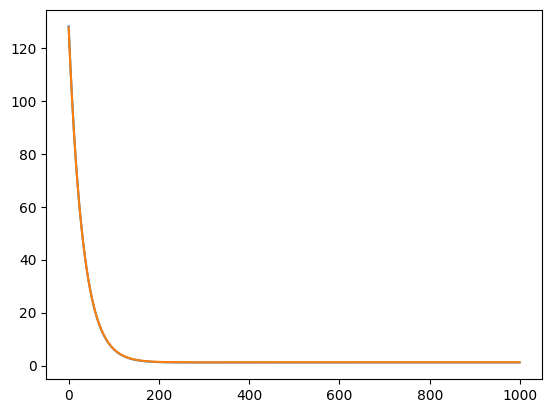

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss)
plt.plot(slr.val_loss)